In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

ImportError: dlopen failed: cannot locate symbol "_Unwind_Resume" referenced by "/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/_path.cpython-36m.so"...

In [ ]:
movies = pd.read_csv("data/fandango_score_comparison.csv")
print("movies data ", movies.shape)
movies.head()

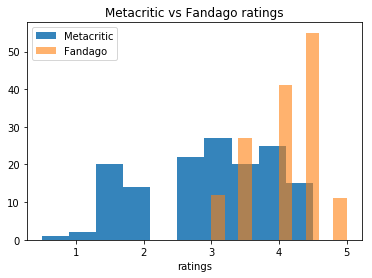

In [99]:
plt.title("Metacritic vs Fandago ratings")
plt.hist(movies["Metacritic_norm_round"], label="Metacritic", alpha=0.9)
plt.xlabel('ratings')
plt.hist(movies["Fandango_Stars"], label="Fandago", alpha=0.6)
plt.legend()
plt.show()

In [28]:
np.mean(movies["Metacritic_norm_round"]), np.mean(movies["Fandango_Stars"])

(2.9726027397260273, 4.089041095890411)

In [29]:
np.median(movies["Metacritic_norm_round"]), np.median(movies["Fandango_Stars"])

(3.0, 4.0)

In [30]:
np.std(movies["Metacritic_norm_round"]), np.std(movies["Fandango_Stars"])

(0.9875610297038636, 0.5385321612699531)

In [49]:
movies["fm_diff"]= np.absolute(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

In [55]:
movies["fm_diff"][:10]

0    1.5
1    1.5
2    2.0
3    4.0
4    2.0
5    2.0
6    1.5
7    0.0
8    0.5
9    0.5
Name: fm_diff, dtype: float64

In [62]:
np.mean(movies["fm_diff"])

1.2808219178082192

In [63]:
movies.sort_values("fm_diff", ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


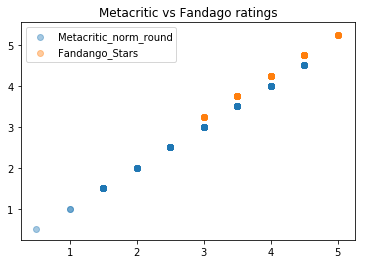

In [110]:
plt.title("Metacritic vs Fandago ratings")
plt.scatter(movies["Metacritic_norm_round"], movies["Metacritic_norm_round"], alpha=.4)
plt.scatter(movies["Fandango_Stars"], movies["Fandango_Stars"]+0.25, alpha=.4)
plt.legend()
plt.show()

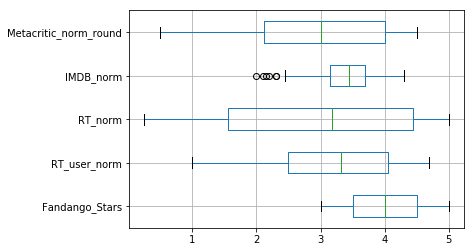

In [105]:
rankings_lst = ['Fandango_Stars',
                'RT_user_norm',
                'RT_norm',
                'IMDB_norm',
                'Metacritic_norm_round']

movies[rankings_lst].boxplot(vert=False)

In [115]:
scipy.stats.pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

(0.17844919073895918, 0.031161516228523815)

In [117]:
r = scipy.stats.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

((1, 5), (1, 6))

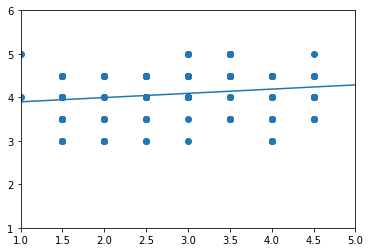

In [151]:
def pred(x=3):
    return x * r.slope + r.intercept
preds = [pred(x) for x in range(1,6)]
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot(range(1,6),preds)
plt.xlim(1,5), plt.ylim(1,6)
